In [40]:
# A schematic representation of the NEVIS model setup
# This script sets up the parameters and configurations for a 2D example of the NEVIS model

from socket import close
#!/usr/bin/env python3
import os   
import sys
import numpy as np
import matplotlib.pyplot as plt 

# Physical parameters
L = 5e4  # Length of the domain (m)
W = 2e4  # Width of the domain (m)
H0 = 1e3  # Initial height (m)

x = np.linspace(0, L, 100)  # x-coordinates
y = np.linspace(0, W, 50)    # y-coordinates
X, Y = np.meshgrid(x, y)      # Create a grid of coordinates
# Thickness profile based on a parabolic function
def thickness_profile(X, Y, H0):
    return np.sqrt(1 - (X / L) ** 2) * H0
H = thickness_profile(X, Y, H0)

# Lake location
xl = 0.5*L
yl = 0.5*W
# moulin location
xm = 0.25*L
ym = 0.5*W

# Plot the thickness profile in a 3D surface plot
fig = plt.figure(figsize=(10, 5))
plt.rcParams["figure.dpi"] = 600
plt.style.use('classic')
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['mathtext.fontset'] = 'dejavusans'
plt.rcParams['font.size'] = 8
%config InlineBackend.figure_format = 'retina'  # high res for retina displays


ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(X, Y, H, cmap='viridis')

# plot the bed at z=0 in brown
Z_bed = np.zeros_like(H)
ax.plot_surface(X, Y, Z_bed,
                color='saddlebrown',
                rstride=5, cstride=5,
                alpha=1.0)
# plot the ice surface in light blue
ax.plot_surface(X, Y, H,
                color='skyblue',
                rstride=5, cstride=5,
                edgecolor='none')
# ensure equal aspect ratio for x, y, z
ax.set_box_aspect((np.ptp(X), np.ptp(Y), np.ptp(H)))
ax.view_init(elev=30, azim=300)  # set the view angle
# plot the lake location on the surface

ax.set_xticks(np.linspace(0, L, 5))
ax.set_yticks(np.linspace(0, W, 5))
ax.set_zticks(np.linspace(0, H0, 5))

ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Thickness (m)')
ax.set_title('Thickness Profile of NEVIS Model')

TypeError: 'float' object does not support item assignment

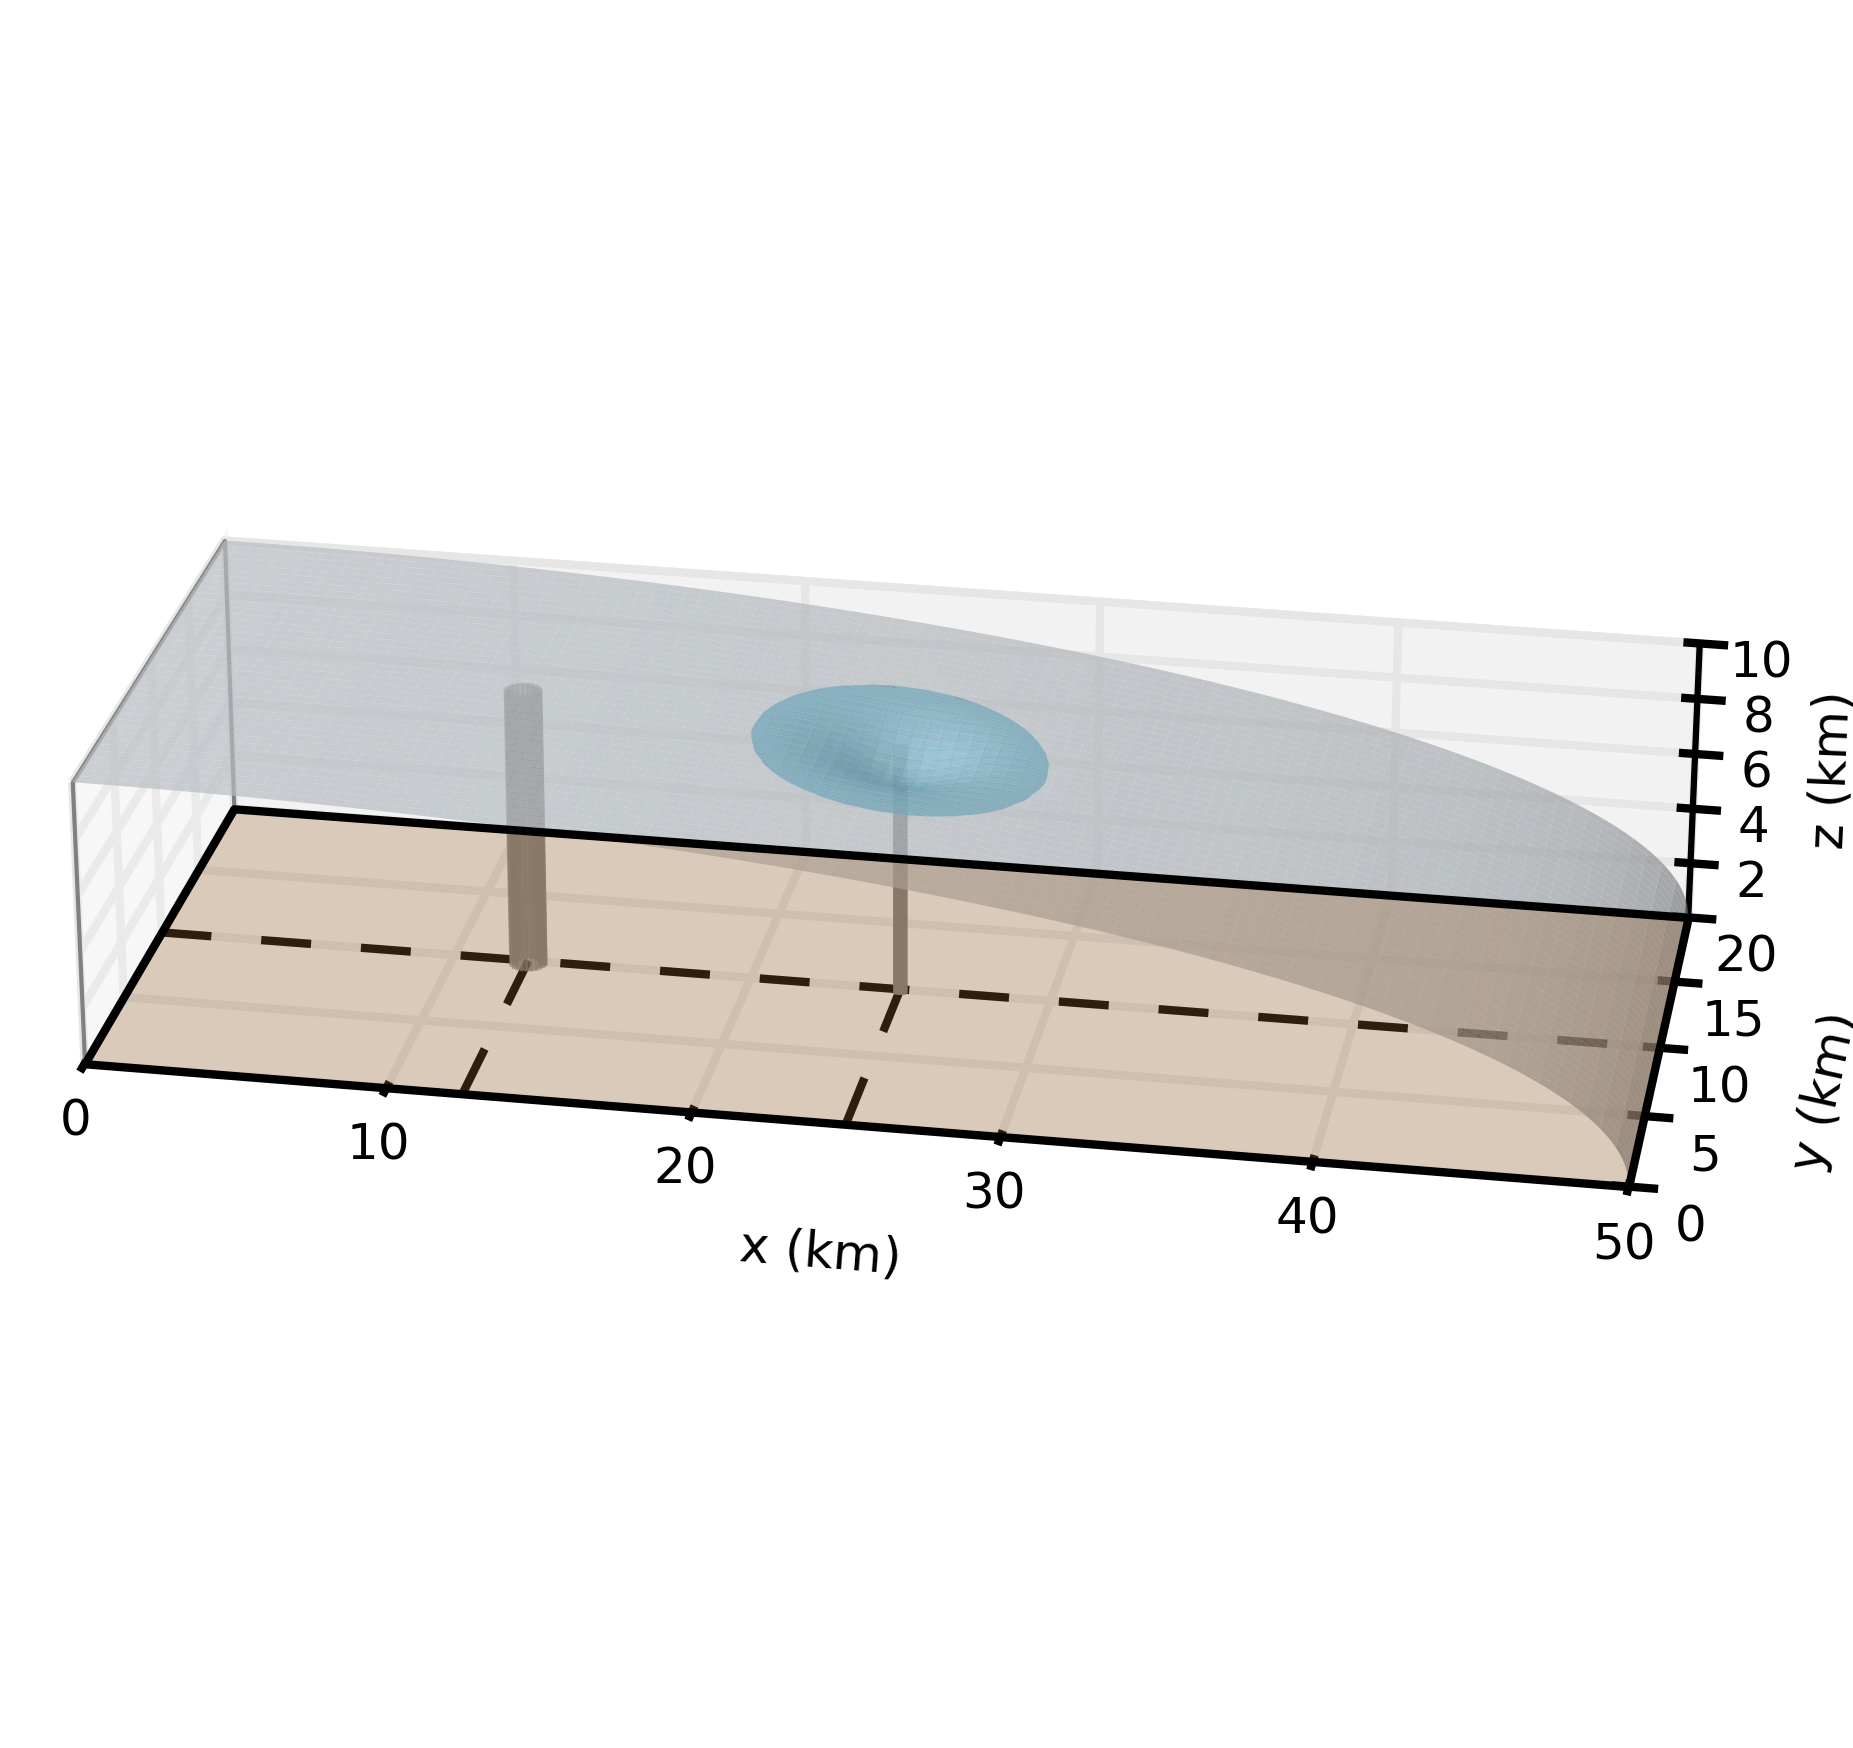

In [234]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Domain sizes
Lx, Ly, H0 = 50, 20, 10  # km dimensions: length, width, ice thickness
xc, yc = Lx/2, Ly/2  # center of the domain
# Lake and moulin locations
x_m = 12.5
y_m = 10.0
x_l = 0.5* Lx
y_l = 0.5* Ly

# Create grid for top surface
nx, ny = 1000, 400
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
X, Y = np.meshgrid(x, y)
def thickness_profile(X, Y, H0):
    """Define a parabolic thickness profile."""
    L = Lx
    return H0 * np.sqrt(1 - (X / L) ** 2)  # parabolic thickness profile
H = thickness_profile(X, Y, H0)
# Define a compressive basin depression on the ice surface
sigma = 1.6
Z = H - 1.0 * np.exp(-(((X-xc)**2 + (Y-yc)**2) / (2*sigma**2)))

# Lake mask (radius 1 km)
r_lake = 1.0
lake_mask = ((X-xc)**2 + (Y-yc)**2) <= r_lake**2

# Plot setup
fig = plt.figure(figsize=(6, 6), dpi=300)
plt.rcParams["figure.dpi"] = 600
plt.style.use('classic')
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['mathtext.fontset'] = 'dejavusans'
plt.rcParams['font.size'] = 6
%config InlineBackend.figure_format = 'retina'  # high res for retina displays


ax = fig.add_subplot(211, projection='3d')

# Top ice surface
ax.plot_surface(X, Y, Z, color='aliceblue', edgecolor='none', linewidth=0, alpha=0.7)

# Lake area overlay
Z_lake = np.where(H-Z>1e-2, H, np.nan)  # only plot lake area where thickness is above a threshold
ax.plot_surface(X, Y, Z_lake, color='deepskyblue', edgecolor='none', linewidth=0, alpha=0.8)

# Bedrock plane
X0 = np.array([[0, Lx], [0, Lx]])
Y0 = np.array([[0, 0], [Ly, Ly]])
Z0 = np.zeros((2,2))
ax.plot_surface(X0, Y0, Z0, color='peru', alpha=0.3)

# Side walls for cross-section
verts = [
    [(0,0,0), (0,Ly,0), (0,Ly,H0), (0,0,H0)],  # left wall
]
ax.add_collection3d(Poly3DCollection(
    verts,
    facecolors='whitesmoke',
    linewidths=0.5,
    edgecolors='gray',
    alpha=0.3
))

# Put a center line on the bed
ax.plot([0, Lx], [0.5*Ly, 0.5*Ly], [0, 0], '--', color='black', linewidth=1.0)
ax.plot([x_m, x_m], [0, y_m], [0, 0], '--', color='black', linewidth=1.0)
ax.plot([x_l, x_l], [0, y_l], [0, 0], '--', color='black', linewidth=1.0)

# Vertical moulin (cylinder)
theta = np.linspace(0, 2*np.pi, 20)
rad = 0.5

x_cyl = x_m
y_cyl = y_m
z_cyl_top = thickness_profile(x_cyl, y_cyl, H0)
z_cyl_bottom = 0.0
ax.plot_surface(
    x_cyl + rad * np.cos(theta)[:, None],
    y_cyl + rad * np.sin(theta)[:, None],
    z_cyl_top + np.zeros_like(theta)[:, None],
    color='deepskyblue', alpha=0.6, rstride=5, cstride=5
)
ax.plot_surface(
    x_cyl + rad * np.cos(theta)[:, None],
    y_cyl + rad * np.sin(theta)[:, None],
    z_cyl_bottom + np.zeros_like(theta)[:, None],
    color='deepskyblue', alpha=0.6, rstride=5, cstride=5
)
for i in range(len(theta)):
    ax.plot(
        [x_cyl + rad * np.cos(theta[i]), x_cyl + rad * np.cos(theta[i])],
        [y_cyl + rad * np.sin(theta[i]), y_cyl + rad * np.sin(theta[i])],
        [z_cyl_top, z_cyl_bottom],
        color='gray', alpha=0.6
    )

# Hydrofracture cylinder
rad = 0.1
z_hydro_top = thickness_profile(x_l, y_l, H0)
z_hydro_bottom = 0.0
ax.plot_surface(
    x_l + rad * np.cos(theta)[:, None],
    y_l + rad * np.sin(theta)[:, None],
    z_hydro_top + np.zeros_like(theta)[:, None],
    color='lightcyan', alpha=0.6, rstride=5, cstride=5
)
ax.plot_surface(
    x_l + rad * np.cos(theta)[:, None],
    y_l + rad * np.sin(theta)[:, None],
    z_hydro_bottom + np.zeros_like(theta)[:, None],
    color='lightcyan', alpha=0.6, rstride=5, cstride=5
)
for i in range(len(theta)):
    ax.plot(
        [x_l + rad * np.cos(theta[i]), x_l + rad * np.cos(theta[i])],
        [y_l + rad * np.sin(theta[i]), y_l + rad * np.sin(theta[i])],
        [z_hydro_top, z_hydro_bottom],
        color='gray', alpha=0.6
    )

ax.set_box_aspect((Lx, Ly, H0))  # aspect ratio is 1:1:1
ax.set_xlabel('x (km)',labelpad=2)
ax.set_ylabel('y (km)',labelpad=-10)
ax.set_zlabel('z (km)',labelpad=-12)
ax.set_zticks(np.arange(2, H0+2, 2))
# 使用 tick_params 和负的 pad 将刻度数字移近
ax.tick_params(axis='x', pad=-2)
ax.tick_params(axis='y', pad=-4)
ax.tick_params(axis='z', pad=-4)

ax.set_xlim(0, Lx)
ax.set_ylim(0, Ly)
ax.set_zlim(0, H0)
ax.view_init(elev=25, azim=280)
# ax.xaxis.set_ticks_position('left') # Draw axis title on the left

# Subplot 2 after lake drainage
plt.tight_layout(rect=[0.05, 0.05, 1, 1])
fig.patch.set_alpha(0.)
ax.patch.set_alpha(0.)
plt.show()
# plt.savefig('figure.png', transparent=True, bbox_inches='tight', pad_inches=0)


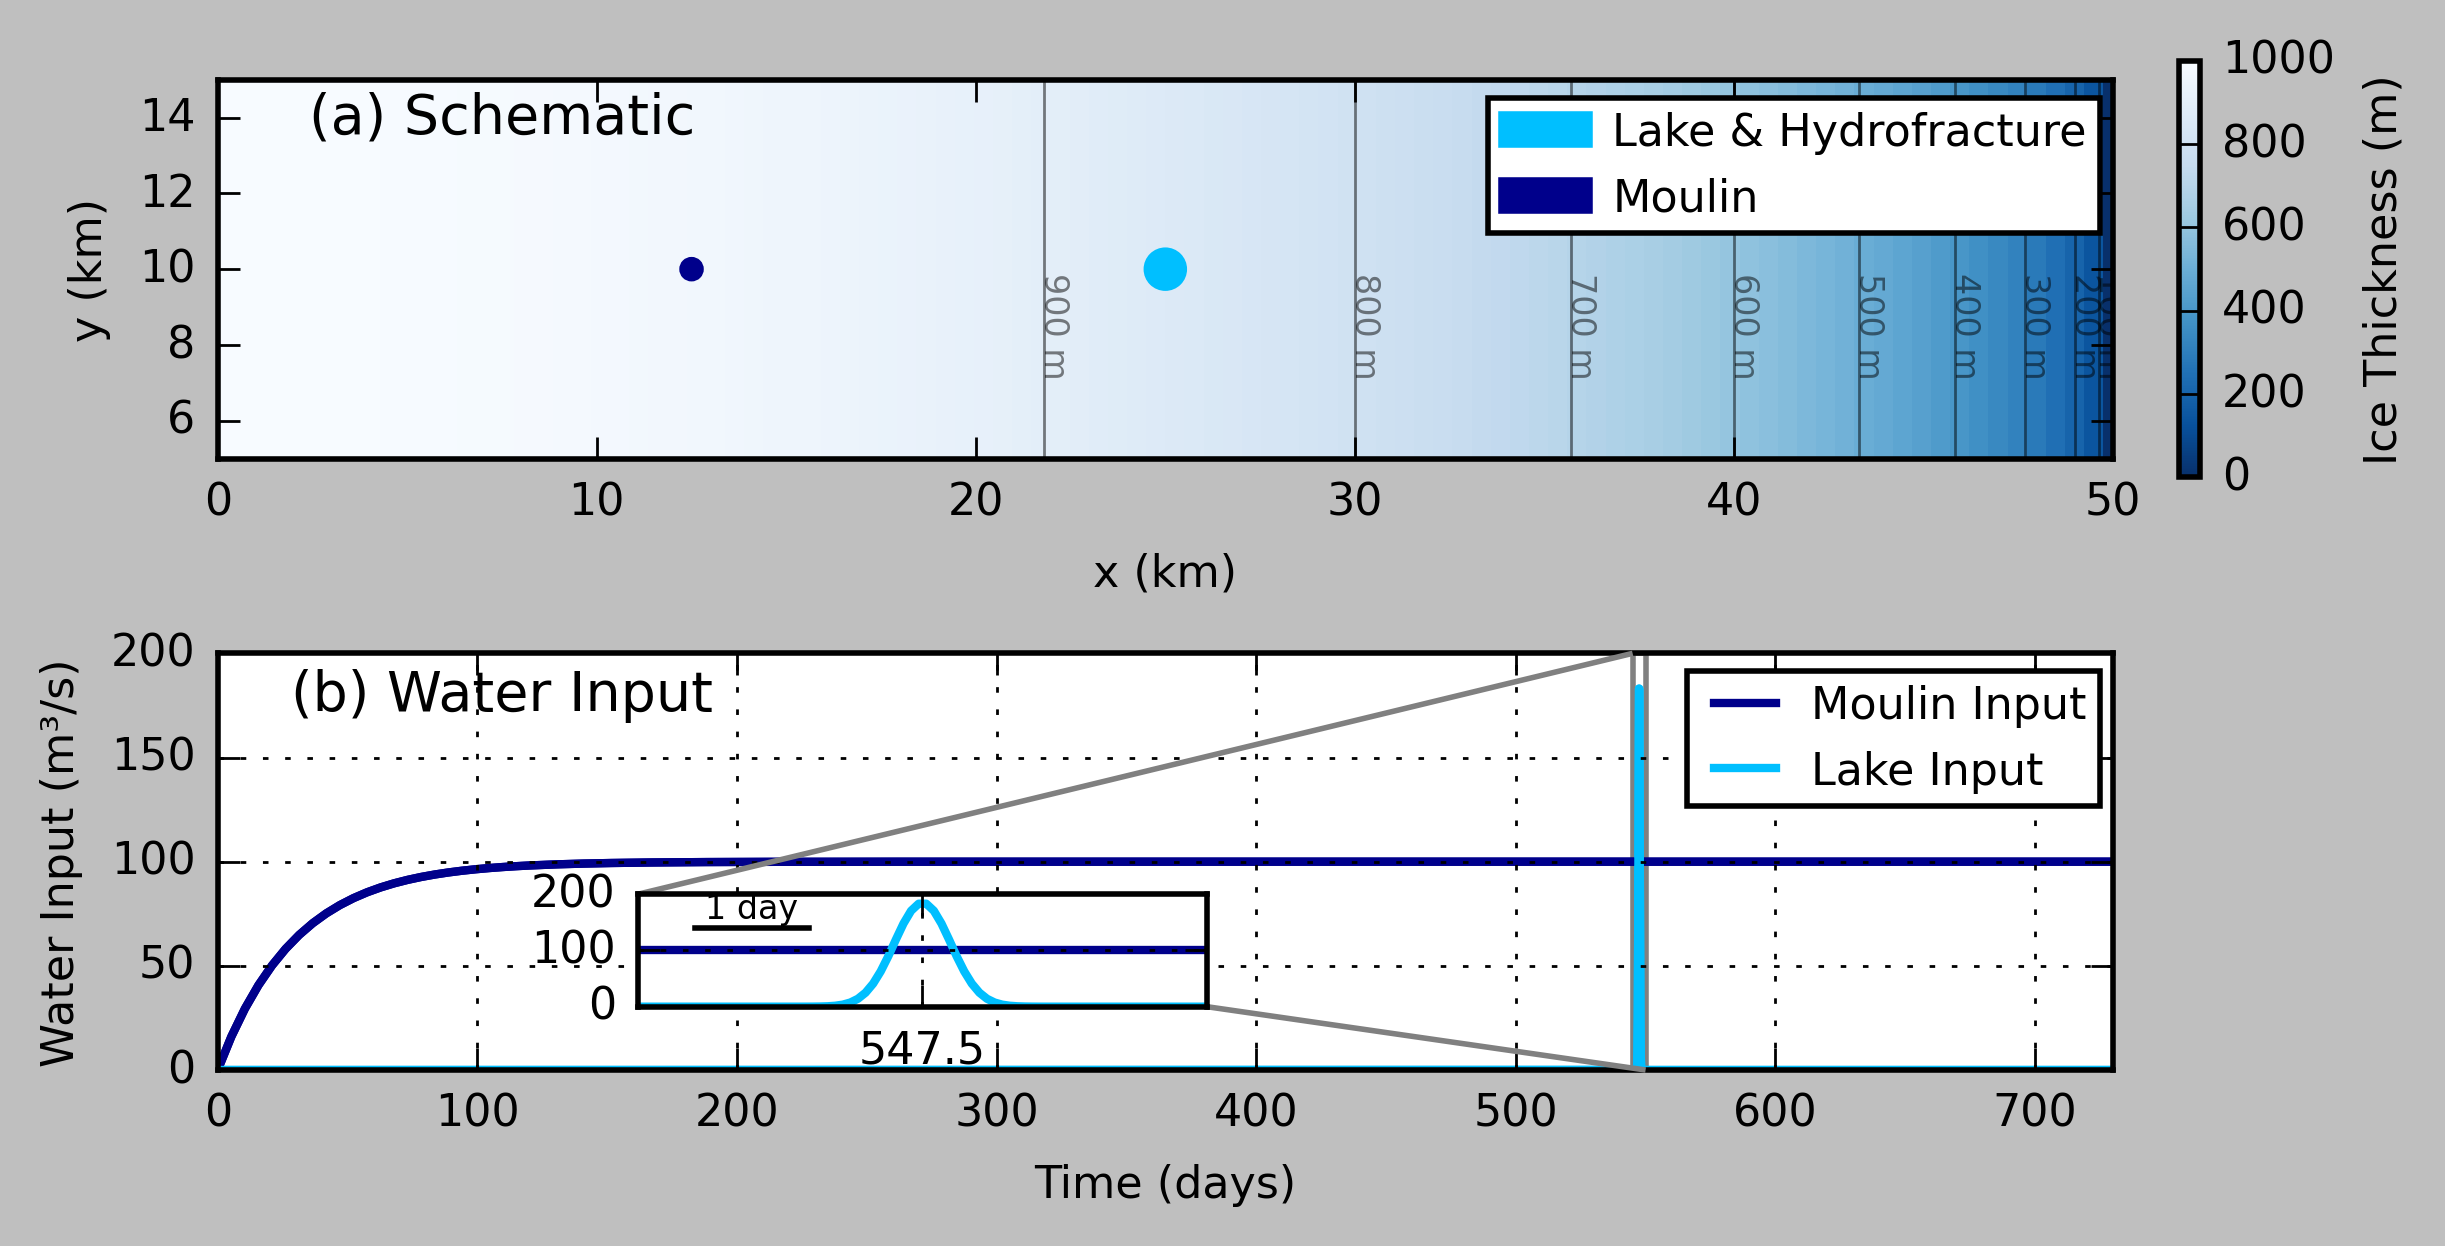

In [406]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# Use the same domain and feature locations from the 3D plot
Lx, Ly = 50, 20
x_m, y_m = 12.5, 10.0
x_l, y_l = 0.5 * Lx, 0.5 * Ly 
r_lake = 0.5  # Radius of the lake depression
rad_moulin = 0.25 # Radius of the moulin
# Create a mesh for x and y coordinates
x = np.linspace(0, Lx, 100)
y = np.linspace(0, Ly, 50)
X, Y = np.meshgrid(x, y)
H = np.sqrt(1 - (X / Lx) ** 2) * 1000  # Parabolic thickness profile

# --- Create the 2D Plan View Plot ---
fig, axes = plt.subplots(2, 1, figsize=(6, 3), dpi=200, constrained_layout=True)
plt.rcParams["figure.dpi"] = 600
plt.style.use('classic')
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['mathtext.fontset'] = 'dejavusans'
plt.rcParams['font.size'] = 8
%config InlineBackend.figure_format = 'retina'  # high res for retina displays

ax = axes[0]  # Use the first subplot for the plan view
# pcolor
c = ax.pcolormesh(X, Y, H, cmap='Blues_r', shading='auto')
c.set_clim(0, 1000)  # Set color limits for the colormap
cb = plt.colorbar(c, ax=ax, label='Ice Thickness (m)', shrink=1.0, pad=0.02)
cb.ax.tick_params(labelsize=8)

# contours
contour_lines = ax.contour(X, Y, H, '-', levels=np.arange(100, 901, 100), colors='k', linewidths=0.5, alpha=0.5)
# 只调整等高线标签的 y 坐标，使其位于中间偏下
labels = ax.clabel(contour_lines, inline=False, fontsize=6, fmt='%d m')
for label in labels:
    label.set_position((label.get_position()[0]+0.25, 8.5))  # Adjust y position
    bbox = label.get_bbox_patch()
    # style the box (optional)
    # bbox.set_boxstyle("round,pad=0.1")
    # bbox.set_facecolor("white")
    # bbox.set_edgecolor("none")
    # bbox.set_alpha(0.5)

# 2. Draw the lake, moulin, and hydrofracture as circles
lake = patches.Circle((x_l, y_l), radius=r_lake, color='deepskyblue', label='Lake & Hydrofracture')
moulin = patches.Circle((x_m, y_m), radius=rad_moulin, color='darkblue', label='Moulin')
# hydrofracture = patches.Circle((x_l, y_l), radius=rad_hydro, color='lightcyan', label='Hydrofracture')

ax.add_patch(lake)
ax.add_patch(moulin)
# ax.add_patch(hydrofracture) # This will be drawn on top of the lake

# 3. Add centerlines
# ax.plot([0, Lx], [Ly/2, Ly/2], '--', color='gray', linewidth=1.0)
# ax.plot([x_m, x_m], [0, Ly], '--', color='gray', linewidth=1.0)
# ax.plot([x_l, x_l], [0, Ly], '--', color='gray', linewidth=1.0)

# 4. Add text labels for features
# ax.text(x_m, y_m-1.5, 'Moulin', va='center')
# ax.text(x_l + r_lake, y_l-1., 'Hydrofracture', va='center')

# 5. Set plot limits, labels, and title
ax.set_xlim(0, Lx)
ax.set_ylim(0.25*Ly, 0.75*Ly)
ax.set_xlabel('x (km)')
ax.set_ylabel('y (km)')
ax.text(0.15, 0.9, '(a) Schematic', fontsize=10, ha='center', va='center', transform=ax.transAxes)
ax.set_aspect('equal', adjustable='box')
ax.grid(False)
ax.legend(loc='upper right', fontsize=8,
          bbox_to_anchor=(1.005, 1.01),  # position the legend outside the plot
          bbox_transform=ax.transAxes,
          labelspacing=0.5,    # vertical space between entries
          handletextpad=0.5,    # space between legend handle and text
          borderpad=0.3         # padding around the legend box
)

# =============== panel b ================
ax = axes[1]  # Use the second subplot for the cross-section
# timeseries of the moulin and lake input
# moulin input function
def moulin_input(t):
    return 100 * (1-np.exp(-t/30)) # spin up time of 30 days

# lake input function
sigma = 0.25
tdrain = 365*1.5
day2sec = 24 * 3600  # seconds in a day
def lake_input(t):
    return 1e7/np.sqrt(2*np.pi)/(sigma*day2sec) * np.exp(-0.5*(t-tdrain)**2/sigma**2)  # Gaussian function with std dev of 30 days

# time vector
# t vector, zoom in around the lake drainage time at 1.5 years
# time vector with finer resolution around lake drainage at tdrain = 365*1.5
t_pre  = np.linspace(0, tdrain-30, 100)        # coarse before drainage
t_peak = np.linspace(tdrain-30, tdrain+30, 900)  # fine around drainage
t_post = np.linspace(tdrain+30, 2*365, 100)    # coarse after drainage
t = np.concatenate((t_pre, t_peak, t_post))
# moulin and lake inputs
moulin_input_values = moulin_input(t)
lake_input_values = lake_input(t)   
# plot the moulin input
ax.plot(t, moulin_input_values, label='Moulin Input', color='darkblue', linewidth=1.5)
# plot the lake input
ax.plot(t, lake_input_values, label='Lake Input', color='deepskyblue', linewidth=1.5)
# fold the x axis to omit the datys between 30days and lake drainage
# --- full time‐series on the main axis ---
ax.plot(t, moulin_input_values, color='darkblue', linewidth=1.5)
ax.plot(t, lake_input_values, color='deepskyblue', linewidth=1.5)
ax.set_xlim(0, 2*365)               # full 0–2 year range
ax.set_ylim(0, 2.0e2)
ax.set_xlabel('Time (days)')
ax.set_ylabel('Water Input (m³/s)')
ax.text(0.15, 0.9, '(b) Water Input', fontsize=10,
    ha='center', va='center', transform=ax.transAxes)
ax.grid(True)
ax.legend(loc='upper right', fontsize=8,
          bbox_to_anchor=(1.005, 1.01),  # position the legend outside the plot
          bbox_transform=ax.transAxes,
          labelspacing=0.5,    # vertical space between entries
          handletextpad=0.5,    # space between legend handle and text
          borderpad=0.3         # padding around the legend box
)

# --- inset zoom around lake drainage ---
x1, x2 = tdrain - 2.5, tdrain + 2.5  # zoom in around lake drainage time

axins = inset_axes(ax,
                   width="40%", height="30%",
                   bbox_to_anchor=(-0.2, -0.35, 0.75, 0.9),
                   bbox_transform=ax.transAxes,
                   borderpad=1)

axins.plot(t, moulin_input_values, color='darkblue', linewidth=1.5)
axins.plot(t, lake_input_values, color='deepskyblue', linewidth=1.5)
axins.set_xlim(x1, x2)
axins.set_ylim(0, 2.0e2)

xt = np.arange(x1, x2 + 1, 2.5)
axins.set_xticks([tdrain])
# axins.set_xticklabels([f"{x}" for x in xt], fontsize=8)
# add a 1-day scale bar to the inset
bar_len = 1.0           # length in days
bar_y   = 140            # y-position (10% of 200 m³/s)
bar_x   = x1 + 0.1*(x2-x1)  # 20% in from left of inset

axins.plot([bar_x, bar_x+bar_len], [bar_y, bar_y], color='k', linewidth=1)
axins.text(bar_x+bar_len/2, bar_y+5, '1 day',
           ha='center', va='bottom', fontsize=6)

axins.set_yticks([0, 100, 200])
axins.set_yticklabels([0, 100, 200], fontsize=8)
axins.grid(True)

# draw handles to the zoom region
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

# save the figure
plt.savefig('Fig1_schematic.png', transparent=True, bbox_inches='tight', pad_inches=0, dpi=600)